In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

import os


In [3]:
img = image.load_img("E:/Neural Network training/DATA_Image/training/00-damage/0001.JPEG")

In [ ]:
plt.imshow(img)

In [5]:
cv2.imread("E:/Neural Network training/DATA_Image/training/00-damage/0001.JPEG").shape


(168, 300, 3)

In [6]:
train = ImageDataGenerator(1/255)
validation = ImageDataGenerator(1/255)

In [7]:
train_dataset = train.flow_from_directory('E:/Neural Network training/DATA_Image/training/',
                                        target_size= (150,150),
                                         batch_size = 50,
                                         class_mode ='binary')

validation_dataset = validation.flow_from_directory('E:/Neural Network training/DATA_Image/validation/',
                                        target_size= (150,150),
                                         batch_size = 50,
                                         class_mode ='binary')

Found 1836 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'00-damage': 0, '01-whole': 1}

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [11]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 15,
                    epochs = 50,
                    validation_data = validation_dataset)

C:\Python\Anaconda3\envs\Tensorflowsessions\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 10 steps
Epoch 1/50


C:\Python\Anaconda3\envs\Tensorflowsessions\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


15/15 [==============================] - 102s 7s/step - loss: 362.5095 - accuracy: 0.5187 - val_loss: 1.0105 - val_accuracy: 0.5239
Epoch 2/50
15/15 [==============================] - 104s 7s/step - loss: 0.7013 - accuracy: 0.6693 - val_loss: 0.7372 - val_accuracy: 0.6043
Epoch 3/50
15/15 [==============================] - 51s 3s/step - loss: 0.7693 - accuracy: 0.6613 - val_loss: 0.9240 - val_accuracy: 0.5457
Epoch 4/50
15/15 [==============================] - 51s 3s/step - loss: 0.9611 - accuracy: 0.6693 - val_loss: 0.6953 - val_accuracy: 0.6239
Epoch 5/50
15/15 [==============================] - 48s 3s/step - loss: 0.5660 - accuracy: 0.7187 - val_loss: 0.7950 - val_accuracy: 0.6609
Epoch 6/50
15/15 [==============================] - 55s 4s/step - loss: 4.8109 - accuracy: 0.6250 - val_loss: 28.5496 - val_accuracy: 0.5000
Epoch 7/50
15/15 [==============================] - 53s 4s/step - loss: 3.3661 - accuracy: 0.6987 - val_loss: 0.7207 - val_accuracy: 0.6543
Epoch 8/50
15/15 [========

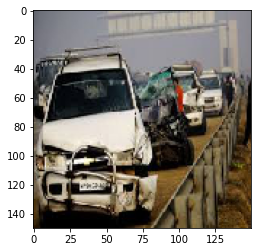

Damaged Car


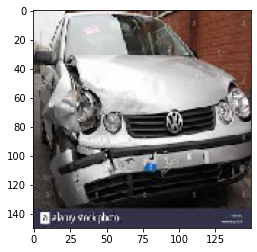

Damaged Car


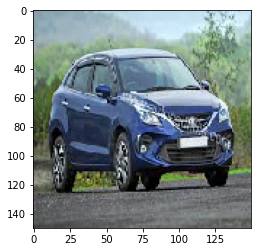

Damaged Car


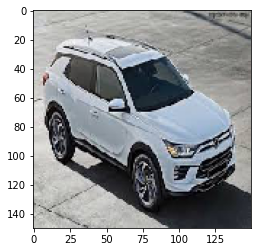

Good Car


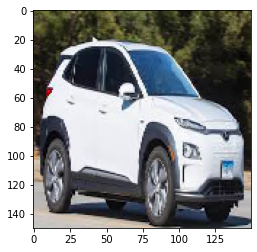

Damaged Car


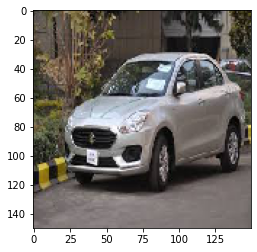

Damaged Car


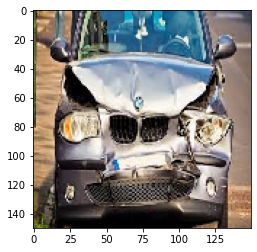

Damaged Car


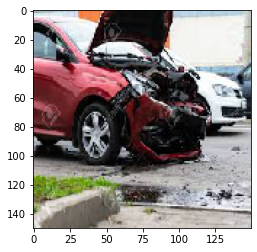

Damaged Car


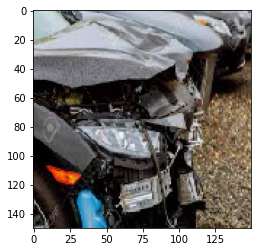

Damaged Car


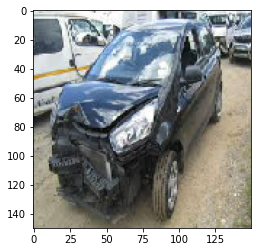

Damaged Car


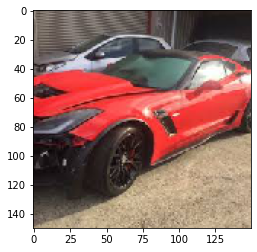

Damaged Car


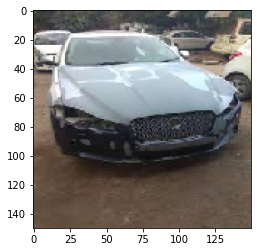

Damaged Car


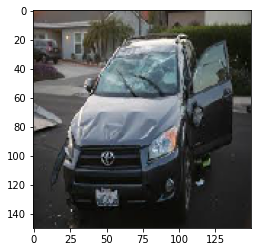

Damaged Car


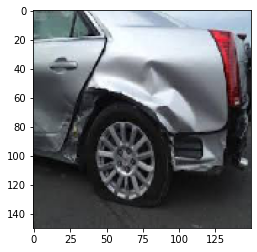

Damaged Car


In [29]:
dir_path = 'E:/Neural Network training/DATA_Image/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size =(150,150))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x= np.expand_dims(x, axis= 0)
    test_images = np.vstack([x])
    
    val=model.predict(test_images)
    
    if val == 1:
        print("Good Car")
    else:
        print("Damaged Car")

In [21]:
img = image.load_img("E:/Neural Network training/DATA_Image/training/00-damage/0001.JPEG",target_size =(150,150))
x = image.img_to_array(img)
x= np.expand_dims(x, axis= 0)
val=model.predict(x)

In [28]:
if val == 1:
    print("Good")
else:
    print("Damaged")

Damaged


In [25]:
print(val)

[[1.77036e-10]]
